In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifier Libraries
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Other Libraries
from sklearn.model_selection import train_test_split

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
def read_csv_file():
    global d
    d=pd.read_csv("/content/drive/My Drive/PROJECTS FILE/train.csv")
    return d
read_csv_file()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
def copy_main_data():
    global df
    df=d.copy()
    return df
copy_main_data()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
# DATA EXPLORATION>>EDA

In [6]:
class data_exploration():

  def df_info(self):
      return df.info()
  
   
  def df_shape(self):
      print(f'no of rows is:{df.shape[0]}')
      print(f'no of features is:{df.shape[1]}')
  

  def df_head(self):
      return df.head()
  

  def df_dtypes(self):
      print('datatypes of features:',df.dtypes)
  

  def df_tail(self):
      return df.tail()
  

  def null_count(self):  
      for features in df.columns:
          print(f'Number of Null values for {features} is:--> {df[features].isna().sum()}')
  

  def int_float_dtype_features(self):
      global df_num
      df_num=df.select_dtypes(exclude=['object'])
      return df_num
  

  def obj_dtype_features(self):
      global df_obj
      df_obj=df.select_dtypes(include=['object'])
      return df_obj
  

  def value_count(self):
      for features in df.columns:
          print("value_counts are:",df[[features]].value_counts())

  def drop_duplicates(self):
      global df
      n_duplicates = df.drop(labels=["id"], axis=1).duplicated().sum()
      print(f"You seem to have {n_duplicates} duplicates in your database.")
      columns_to_consider = df.drop(labels=["id"], axis=1).columns
      df = df.drop_duplicates(subset=columns_to_consider)
      return df.shape        


  def df_describes(self):
      
      return df.describe()
  
  
      
obj=data_exploration()


In [7]:
obj.df_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
obj.df_shape()

no of rows is:381109
no of features is:12


In [9]:
obj.df_head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [10]:
obj.df_dtypes()

datatypes of features: id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


In [11]:
obj.df_tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [12]:
obj.null_count()

Number of Null values for id is:--> 0
Number of Null values for Gender is:--> 0
Number of Null values for Age is:--> 0
Number of Null values for Driving_License is:--> 0
Number of Null values for Region_Code is:--> 0
Number of Null values for Previously_Insured is:--> 0
Number of Null values for Vehicle_Age is:--> 0
Number of Null values for Vehicle_Damage is:--> 0
Number of Null values for Annual_Premium is:--> 0
Number of Null values for Policy_Sales_Channel is:--> 0
Number of Null values for Vintage is:--> 0
Number of Null values for Response is:--> 0


In [13]:
obj.int_float_dtype_features()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,40454.0,26.0,217,1
1,2,76,1,3.0,0,33536.0,26.0,183,0
2,3,47,1,28.0,0,38294.0,26.0,27,1
3,4,21,1,11.0,1,28619.0,152.0,203,0
4,5,29,1,41.0,1,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,26.0,1,30170.0,26.0,88,0
381105,381106,30,1,37.0,1,40016.0,152.0,131,0
381106,381107,21,1,30.0,1,35118.0,160.0,161,0
381107,381108,68,1,14.0,0,44617.0,124.0,74,0


In [14]:
obj.obj_dtype_features()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No
...,...,...,...
381104,Male,1-2 Year,No
381105,Male,< 1 Year,No
381106,Male,< 1 Year,No
381107,Female,> 2 Years,Yes


In [15]:
obj.value_count()

value_counts are: id    
1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Length: 381109, dtype: int64
value_counts are: Gender
Male      206089
Female    175020
dtype: int64
value_counts are: Age
24     25960
23     24256
22     20964
25     20636
21     16457
       ...  
81        56
82        29
83        22
84        11
85        11
Length: 66, dtype: int64
value_counts are: Driving_License
1                  380297
0                     812
dtype: int64
value_counts are: Region_Code
28.0           106415
8.0             33877
46.0            19749
41.0            18263
15.0            13308
30.0            12191
29.0            11065
50.0            10243
3.0              9251
11.0             9232
36.0             8797
33.0             7654
47.0             7436
35.0             6942
6.0              6280
45.0             5605
37.0             5501
18.0             5153
48.0             4681
14.0 

In [16]:
obj.drop_duplicates()

You seem to have 269 duplicates in your database.


(380840, 12)

In [17]:
# df.drop('id',axis=1,inplace=True)

In [18]:
obj.df_describes()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000,380840.000000
mean,190510.426746,38.823593,0.997868,26.388307,0.458208,30584.016078,112.030225,154.344607,0.122584
std,110013.887208,15.513206,0.046126,13.229907,0.498251,17203.258664,54.206194,83.670240,0.327960
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95230.750000,25.000000,1.000000,15.000000,0.000000,24426.000000,29.000000,82.000000,0.000000
50%,190497.500000,36.000000,1.000000,28.000000,0.000000,31678.500000,133.000000,154.000000,0.000000
75%,285774.250000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [19]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [20]:
# visualization

In [21]:
class visualization():

  def outliers(self):
      for features in df_num:
          plt.figure()
          print("boxplot:,features",'\n',df_num[[features]].boxplot())
          print(plt.show())
 


  def hist_kde_plot(self):
      for features in df_num.columns:

          print("hist_kde_plot:",features,'\n',sns.histplot(df[features],kde=True))
          print(plt.show())
   

  def count_plot(self):    
      for features in df_num.columns:
        print('plt_fig',plt.figure())
        
        print("countplot:",features,'\n',sns.countplot(df_num[features]))
        print(plt.show())
  

  def scatter_plot(self):
      print('scatter plot:',sns.pairplot(df))
 

obj=visualization()


In [22]:
# obj.outliers()

In [23]:
# obj.hist_kde_plot()

In [24]:
# obj.count_plot()

In [25]:
# obj.scatter_plot()

In [26]:
# ind features vs target features

In [27]:
class ind_vs_dependant():

  def Target_Variable_Response(self):
      return sns.countplot(df['Response'])
  


  def Age_vs_Annual_premium(self):
      print(sns.scatterplot(x=df['Age'],y=df['Annual_Premium']))
  

  def Gender_vs_Response(self):
      # return sns.countplot(df.Gender)
      return sns.countplot(x='Gender',hue='Response',data=df)
  

  def Driving_license_vs_Response(self):
      # return sns.countplot(df.Driving_license)
      return sns.countplot(x='Driving_license',hue='Response',data=df)
  

  def Driving_license_by_Gender(self):
      df_dl=df.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
      return df_dl
  

  def Customers_having_Vehicle_insurance_already(self):
      # return sns.countplot(df.Previously_Insured)
      return sns.countplot(x='Previously_Insured',hue='Response',data=df)
  

  def Customers_having_damaged_vehicle(self):
      # return sns.countplot(df.Vehicle_Damage)
      return sns.countplot(x='Vehicle_Damage',hue='Response',data=df)

  

  def Annual_Premium_Distribution(self):
      # return sns.distplot(df.Annual_Premium)
      return sns.countplot(x='Annual_Premium',hue='Response',data=df)
  


  def correlation_heatmap(self):
      plt.figure(figsize=[15,12])
      plt.savefig('vehicle_insurance.jpg')
      return sns.heatmap(df.corr(),annot=True,cmap='YIGnBu')

obj=ind_vs_dependant()
     
  


In [28]:
# obj.Target_Variable_Response()

In [29]:
# obj.Age_vs_Annual_premium()

In [30]:
# obj.Gender_vs_Response()

In [31]:
# obj.Driving_license_vs_Response

In [32]:
# obj.Driving_license_by_Gender()

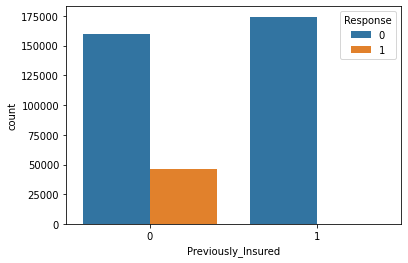

In [33]:
obj.Customers_having_Vehicle_insurance_already()

In [34]:
# obj.Customers_having_damaged_vehicle()

In [35]:
# obj.Annual_Premium_Distribution()

In [36]:
# obj.correlation_heatmap()

In [37]:


df_Gender = pd.DataFrame({'Gender':['Male','Female']})
df_Gender

,Gender
0,Male
1,Female


In [38]:
label_enc = LabelEncoder()
df['Gender']=label_enc.fit_transform(df['Gender'])
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [39]:
label_enc = LabelEncoder()
df['Vehicle_Age']=label_enc.fit_transform(df['Vehicle_Age'])
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,No,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,No,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,No,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,Yes,44617.0,124.0,74,0


In [40]:

label_enc = LabelEncoder()
df['Vehicle_Damage']=label_enc.fit_transform(df['Vehicle_Damage'])
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [41]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [79]:
# outliers handling
threshold = 2
outliers_list=[]

mean = df["Annual_Premium"].mean()

std = df["Annual_Premium"].std()

for x_val in df["Annual_Premium"]:
    z_score = (x_val - mean)/std
    z_score = np.abs(z_score)
#     print(x_val, '>>', z_score)
    
    if z_score > threshold:
        outliers_list.append(x_val)

q1 = df['Annual_Premium'].quantile(0.25)
q2 = df['Annual_Premium'].quantile(0.5)
q3 = df['Annual_Premium'].quantile(0.75)
print(f'q1 == {q1}, q2== {q2},q3 =={q3}')

iqr = q3 -q1
print('IQR is :',iqr)

Upper_fense = q3 + 1.5* iqr
Lower_fense = q1 - 1.5* iqr
print (Upper_fense)
median = df["Annual_Premium"].median()
print (median)
# #----------------------------------------------------------------------------
df["Annual_Premium"]=np.where(df.Annual_Premium>Upper_fense,Upper_fense,df.Annual_Premium)
# print ("The box plot after removing the outliers :\n")
# sns.kdeplot(df1["Annual_Premium"], fill=True)
# plt.boxplot(df[["Annual_Premium"]])
# plt.show()

q1 == 24426.0, q2== 31678.25,q3 ==38352.0
IQR is : 13926.0
59241.0
31678.25


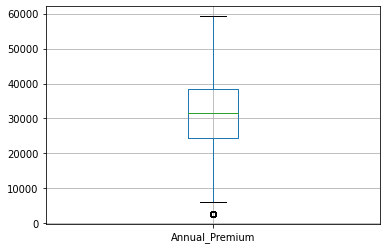

In [80]:
df[['Annual_Premium']].boxplot()

In [ ]:
df.boxplot()

In [44]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,0,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,1,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,1,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


In [81]:
y = df['Response']
x = df.drop('Response',axis=1)
x.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39


In [82]:
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE

ro=RandomOverSampler(0.3,random_state=1)
x_ro,y_ro=ro.fit_resample(x,y)
print(y.value_counts())
print(y_ro.value_counts())

0    334155
1     46685
Name: Response, dtype: int64
0    334155
1    100246
Name: Response, dtype: int64


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_ro,y_ro,test_size=0.2,random_state=10)

In [84]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()


In [49]:
# x_train_norm = norm.fit_transform(x_train)
# x_test_norm = norm.transform(x_test)

In [85]:
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)
x_train

array([[8.31005909e-01, 0.00000000e+00, 1.07692308e-01, ...,
        4.20395330e-01, 9.32098765e-01, 1.07266436e-01],
       [8.77465180e-01, 1.00000000e+00, 3.53846154e-01, ...,
        3.22622812e-01, 7.59259259e-01, 8.40830450e-01],
       [3.33238872e-04, 0.00000000e+00, 3.07692308e-02, ...,
        3.76693575e-01, 9.81481481e-01, 4.15224913e-02],
       ...,
       [9.37033597e-01, 0.00000000e+00, 4.61538462e-02, ...,
        3.76287294e-01, 9.32098765e-01, 9.58477509e-01],
       [6.21267462e-01, 0.00000000e+00, 4.92307692e-01, ...,
        2.75847450e-01, 1.54320988e-01, 7.43944637e-01],
       [9.06745594e-01, 0.00000000e+00, 7.69230769e-02, ...,
        0.00000000e+00, 9.81481481e-01, 7.75086505e-01]])

In [86]:
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

LogisticRegression()

In [87]:
y_pred = lr_clf.predict(x_test)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [88]:
# accuracy of testing
# test_accuracy=lr_clf.score(y_pred,y_test)
test_accuracy = accuracy_score(y_test,y_pred)
# print(train_accuracy)
print(test_accuracy)

0.7698115813584098


In [89]:
# training of test
y_pred_train=lr_clf.predict(x_train)
train_Accuracy = accuracy_score(y_train, y_pred_train)
print(train_Accuracy)

0.7702722145488029


In [90]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is: \n',cnf_matrix)

Confusion Matrix is: 
 [[64155  2568]
 [17431  2727]]


In [91]:
clf_report = classification_report(y_test, y_pred)
print('Classification Report is : \n', clf_report)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.79      0.96      0.87     66723
           1       0.52      0.14      0.21     20158

    accuracy                           0.77     86881
   macro avg       0.65      0.55      0.54     86881
weighted avg       0.72      0.77      0.71     86881



In [57]:
# hyperparameters tuning

In [92]:
from sklearn.neighbors import KNeighborsClassifier


In [93]:
knn_model = KNeighborsClassifier(n_neighbors=11,p=2)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [94]:
y_pred = knn_model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[58256,  8467],
       [ 9544, 10614]])

In [95]:
test_acc=accuracy_score(y_test, y_pred)
print(test_acc)


0.7926934542650291


In [96]:
# # train_accuracy
# y_pred_train=knn_model.predict(x_train)
# train_accuracy=accuracy_score(y_train,y_pred_train)
# print(train_accuracy)

In [98]:
clf_report = classification_report(y_test,y_pred)
print('Classification Report : \n', clf_report)

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.87      0.87     66723
           1       0.56      0.53      0.54     20158

    accuracy                           0.79     86881
   macro avg       0.71      0.70      0.70     86881
weighted avg       0.79      0.79      0.79     86881



In [99]:
# dt_model = DecisionTreeClassifier(max_depth=4)
dt_model = DecisionTreeClassifier(random_state=1,ccp_alpha=0.0)



# Testing Accuracy
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.8786385976220348
Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     66723
           1       0.70      0.85      0.76     20158

    accuracy                           0.88     86881
   macro avg       0.82      0.87      0.84     86881
weighted avg       0.89      0.88      0.88     86881

Confusion Matrix :
 [[59226  7497]
 [ 3047 17111]]


In [100]:
# Training Accuracy

y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 1.0
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    267432
           1       1.00      1.00      1.00     80088

    accuracy                           1.00    347520
   macro avg       1.00      1.00      1.00    347520
weighted avg       1.00      1.00      1.00    347520

Confusion Matrix :
 [[267432      0]
 [     0  80088]]


In [101]:
# dt_model = DecisionTreeClassifier(max_depth=4)
dt_model = DecisionTreeClassifier(random_state=8,ccp_alpha=0.001)



# Testing Accuracy
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7679814919257375
Classification Report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     66723
           1       0.00      0.00      0.00     20158

    accuracy                           0.77     86881
   macro avg       0.38      0.50      0.43     86881
weighted avg       0.59      0.77      0.67     86881

Confusion Matrix :
 [[66723     0]
 [20158     0]]


In [102]:
# Training Accuracy

y_pred_train = dt_model.predict(x_train)
test_accuracy = accuracy_score(y_train, y_pred_train)
print('Test Data Accuracy is:\n',test_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report :\n',clf_report)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print('Confusion Matrix :\n',cnf_matrix)

Test Data Accuracy is:
 0.7695441988950277
Classification Report :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87    267432
           1       0.00      0.00      0.00     80088

    accuracy                           0.77    347520
   macro avg       0.38      0.50      0.43    347520
weighted avg       0.59      0.77      0.67    347520

Confusion Matrix :
 [[267432      0]
 [ 80088      0]]


In [103]:
rf_model = RandomForestClassifier(random_state=10,ccp_alpha=0.0)
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
clf_report = classification_report(y_test, y_pred)
print('Classification Report is : \n', clf_report)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95     66723
           1       0.84      0.82      0.83     20158

    accuracy                           0.92     86881
   macro avg       0.89      0.88      0.89     86881
weighted avg       0.92      0.92      0.92     86881



In [104]:
rf_model = RandomForestClassifier(max_depth=4,random_state=5,ccp_alpha=0.0)
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
clf_report = classification_report(y_test, y_pred)
print('Classification Report is : \n', clf_report)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     66723
           1       0.00      0.00      0.00     20158

    accuracy                           0.77     86881
   macro avg       0.38      0.50      0.43     86881
weighted avg       0.59      0.77      0.67     86881



In [105]:
rf_model = RandomForestClassifier(criterion = "gini",random_state = 10,max_depth=4, min_samples_leaf=5,ccp_alpha=0.0)
rf_model.fit(x_train, y_train)
y_pred=rf_model.predict(x_test)
clf_report = classification_report(y_test, y_pred)
print('Classification Report is : \n', clf_report)

Classification Report is : 
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     66723
           1       0.00      0.00      0.00     20158

    accuracy                           0.77     86881
   macro avg       0.38      0.50      0.43     86881
weighted avg       0.59      0.77      0.67     86881



In [106]:
y_pred_train= rf_model.predict(x_train)

train_accuracy =accuracy_score(y_train, y_pred_train)
print('Train Data Accuracy :', train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report is :\n',clf_report)

cnf_matrix=confusion_matrix(y_train, y_pred_train)
cnf_matrix

Train Data Accuracy : 0.7695441988950277
Classification Report is :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87    267432
           1       0.00      0.00      0.00     80088

    accuracy                           0.77    347520
   macro avg       0.38      0.50      0.43    347520
weighted avg       0.59      0.77      0.67    347520



array([[267432,      0],
       [ 80088,      0]])

In [72]:
# test accuracy
y_pred = rf_model.predict(x_test)

test_accuracy = accuracy_score(y_test, y_pred)
print('Test Data Accuracy :', test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classification Report is :\n',clf_report)

confusion_matrix(y_test, y_pred)

Test Data Accuracy : 0.7679814919257375
Classification Report is :
               precision    recall  f1-score   support

           0       0.77      1.00      0.87     66723
           1       0.00      0.00      0.00     20158

    accuracy                           0.77     86881
   macro avg       0.38      0.50      0.43     86881
weighted avg       0.59      0.77      0.67     86881



array([[66723,     0],
       [20158,     0]])

In [73]:
# adaboost

In [74]:
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test , y_train, y_test = train_test_split(x_ro,y_ro ,test_size=0.20, random_state=1)
ad_boost = AdaBoostClassifier(random_state=1)
ad_boost.fit(x_train, y_train)

AdaBoostClassifier(random_state=1)

In [75]:
y_pred = ad_boost.predict(x_test)
y_pred

test_accuracy = accuracy_score(y_test, y_pred)
print('Test data Acuracy is :', test_accuracy)

clf_report = classification_report(y_test, y_pred)
print('Classificationaa Report is :\n',clf_report)

confusion_matrix(y_test, y_pred)

Test data Acuracy is : 0.788526835556681
Classificationaa Report is :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87     66787
           1       0.55      0.46      0.50     20094

    accuracy                           0.79     86881
   macro avg       0.70      0.67      0.68     86881
weighted avg       0.78      0.79      0.78     86881



array([[59329,  7458],
       [10915,  9179]])

In [76]:
# Train accuracy
y_pred_train = ad_boost.predict(x_train)
y_pred_train

train_accuracy = accuracy_score(y_train, y_pred_train)
print('TRain data Acuracy is :', train_accuracy)

clf_report = classification_report(y_train, y_pred_train)
print('Classification Report is :\n',clf_report)

confusion_matrix(y_train, y_pred_train)

TRain data Acuracy is : 0.7882395257826887
Classification Report is :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87    267368
           1       0.55      0.45      0.50     80152

    accuracy                           0.79    347520
   macro avg       0.70      0.67      0.68    347520
weighted avg       0.78      0.79      0.78    347520



array([[237520,  29848],
       [ 43743,  36409]])

In [77]:
# logclf=LogisticRegression(penalty='l2',C=0.001, random_state=0.001)

# treeclf=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0)

# knnclf=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

# randfo=RandomForestClassifier()

In [ ]:
# from sklearn.model_selection import cross_val_score

# clf_labels=['Logistic Regression','Decision Tree','KNN','randfofo']

# for clf, label in zip ([logclf,treeclf,knnclf,randfo],clf_labels):
#     scores=cross_val_score(estimator=clf,X=x_train,y=y_train,cv=10,scoring='accuracy')
#     print("accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(),scores.std(),label))